# P152_G5_Project_1_Classification

### Business Objective:
The variable to be predicted has two values (positive or negative on diabetic retinopathy). Thus, this is a binary classification project. The goal here is to predict whether a patient will suffer from diabetic retinopathy or not, conditioned on blood test features.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

#### 1. Importing the data

In [6]:
data = pd.read_csv('pronostico_dataset_m1.csv')
data

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [7]:
data_1 = data.drop('ID', axis =1)
data_1

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


#### 2. Data Understanding

In [18]:
data_1.info

<bound method DataFrame.info of             age  systolic_bp  diastolic_bp  cholesterol       prognosis
0     77.196340    85.288742     80.021878    79.957109     retinopathy
1     63.529850    99.379736     84.852361   110.382411     retinopathy
2     69.003986   111.349455    109.850616   100.828246     retinopathy
3     82.638210    95.056128     79.666851    87.066303     retinopathy
4     78.346286   109.154591     90.713220    92.511770     retinopathy
...         ...          ...           ...          ...             ...
5995  49.611850    94.857639     86.615671   107.643986  no_retinopathy
5996  63.099686   100.039527     93.515186   104.971404     retinopathy
5997  55.562243    98.421446    102.697875   120.875951     retinopathy
5998  63.468956   106.809289     88.060631   106.052213     retinopathy
5999  62.506825    96.900784     86.878033   108.625436  no_retinopathy

[6000 rows x 5 columns]>

In [8]:
data_1.shape

(6000, 5)

In [9]:
data_1.isnull().sum()

age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [10]:
data_1.dtypes

age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis        object
dtype: object

In [11]:
data_1.describe()

,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255
std,8.564392,10.669267,9.648200,10.433915
min,35.164761,69.675429,62.807105,69.967453
25%,54.371941,93.267420,83.641788,93.202373
50%,59.831159,100.119926,89.912429,100.060637
75%,65.809652,107.439501,96.682405,107.250829
max,103.279497,151.699660,133.456382,148.233544


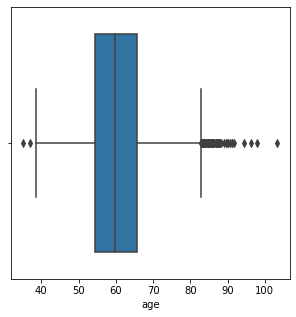

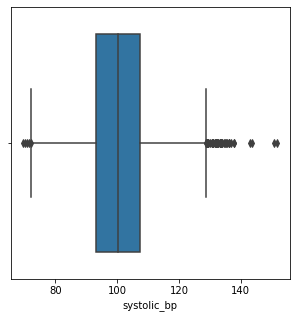

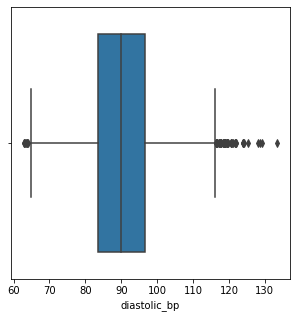

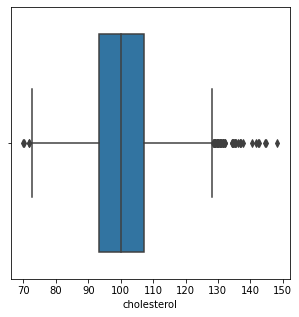

In [12]:
fig, a = plt.subplots(figsize=(5, 5))
a = sns.boxplot(data_1['age'])
fig, b = plt.subplots(figsize=(5, 5))
b = sns.boxplot(data_1['systolic_bp'])
fig, c = plt.subplots(figsize=(5, 5))
c = sns.boxplot(data_1['diastolic_bp'])
fig, d = plt.subplots(figsize=(5, 5))
d = sns.boxplot(data_1['cholesterol'])

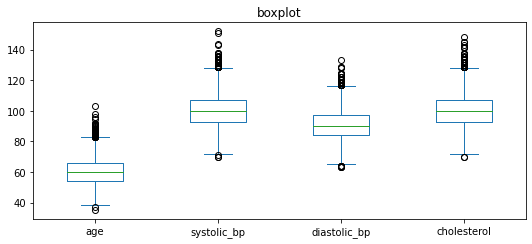

In [30]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = data_1[['age', 'systolic_bp','diastolic_bp', 'cholesterol']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [13]:
stats.skew(data_1['age']),stats.skew(data_1['systolic_bp']),stats.skew(data_1['diastolic_bp']),stats.skew(data_1['cholesterol'])

(0.44103022793961805,
 0.3345710437232818,
 0.3364706951380214,
 0.3614239343849043)

In [14]:
stats.kurtosis(data_1['age']),stats.kurtosis(data_1['systolic_bp']),stats.kurtosis(data_1['diastolic_bp']),stats.kurtosis(data_1['cholesterol'])

(0.27377627961884565,
 0.21152590580286867,
 0.16105310512609083,
 0.2583780161986309)

In [15]:
data_1['prognosis'].value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

In [16]:
data_1_corr = data_1.corr()

<AxesSubplot:>

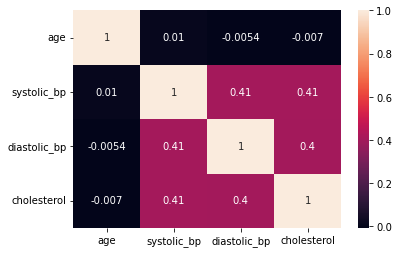

In [17]:
sns.heatmap(data_1_corr, annot=True)

In [19]:
data_1

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [23]:
data_1['age'] = data_1['age'].round(1)
data_1['systolic_bp'] = data_1['systolic_bp'].round(0)
data_1['diastolic_bp'] = data_1['diastolic_bp'].round(0)
data_1['cholesterol'] = data_1['cholesterol'].round(0)
data_1

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.2,85.0,80.0,80.0,retinopathy
1,63.5,99.0,85.0,110.0,retinopathy
2,69.0,111.0,110.0,101.0,retinopathy
3,82.6,95.0,80.0,87.0,retinopathy
4,78.3,109.0,91.0,93.0,retinopathy
...,...,...,...,...,...
5995,49.6,95.0,87.0,108.0,no_retinopathy
5996,63.1,100.0,94.0,105.0,retinopathy
5997,55.6,98.0,103.0,121.0,retinopathy
5998,63.5,107.0,88.0,106.0,retinopathy


In [25]:
labelencoder = LabelEncoder()

In [27]:
data_1['prognosis_N'] = labelencoder.fit_transform(data_1['prognosis'])
data_1

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,prognosis_N
0,77.2,85.0,80.0,80.0,retinopathy,1
1,63.5,99.0,85.0,110.0,retinopathy,1
2,69.0,111.0,110.0,101.0,retinopathy,1
3,82.6,95.0,80.0,87.0,retinopathy,1
4,78.3,109.0,91.0,93.0,retinopathy,1
...,...,...,...,...,...,...
5995,49.6,95.0,87.0,108.0,no_retinopathy,0
5996,63.1,100.0,94.0,105.0,retinopathy,1
5997,55.6,98.0,103.0,121.0,retinopathy,1
5998,63.5,107.0,88.0,106.0,retinopathy,1


In [29]:
data_1 = data_1.drop(labels='prognosis',axis=1)
data_1

,age,systolic_bp,diastolic_bp,cholesterol,prognosis_N
0,77.2,85.0,80.0,80.0,1
1,63.5,99.0,85.0,110.0,1
2,69.0,111.0,110.0,101.0,1
3,82.6,95.0,80.0,87.0,1
4,78.3,109.0,91.0,93.0,1
...,...,...,...,...,...
5995,49.6,95.0,87.0,108.0,0
5996,63.1,100.0,94.0,105.0,1
5997,55.6,98.0,103.0,121.0,1
5998,63.5,107.0,88.0,106.0,1


In [32]:
stat, p = stats.shapiro(data_1['age'])
if p < 0.05:
    print('P value is ',p,'Thus data is Normal')
else:
    print('P value is ',p,'Thus data is Not Normal')

P value is  4.244177289097922e-21 Thus data is Normal


In [33]:
stat, p = stats.shapiro(data_1['systolic_bp'])
if p < 0.05:
    print('P value is ',p,'Thus data is Normal')
else:
    print('P value is ',p,'Thus data is Not Normal')

P value is  8.329984054116846e-17 Thus data is Normal


In [34]:
stat, p = stats.shapiro(data_1['diastolic_bp'])
if p < 0.05:
    print('P value is ',p,'Thus data is Normal')
else:
    print('P value is ',p,'Thus data is Not Normal')

P value is  3.986271053037971e-17 Thus data is Normal


In [35]:
stat, p = stats.shapiro(data_1['cholesterol'])
if p < 0.05:
    print('P value is ',p,'Thus data is Normal')
else:
    print('P value is ',p,'Thus data is Not Normal')

P value is  7.140213948570997e-18 Thus data is Normal


In [ ]:
#AGE

In [36]:
df1=data_1[data_1["age"]>50]
df2=data_1[data_1["age"]<50]

<AxesSubplot:ylabel='prognosis_N'>

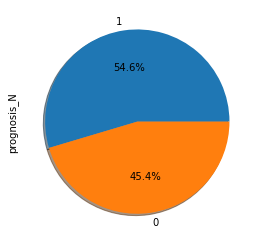

In [37]:
df1['prognosis_N'].value_counts().plot(kind="pie",shadow=True,autopct='%1.1f%%')

<AxesSubplot:ylabel='prognosis_N'>

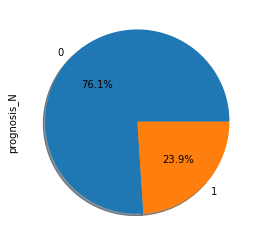

In [38]:
df2['prognosis_N'].value_counts().plot(kind="pie",shadow=True,autopct='%1.1f%%')

In [ ]:
#systolic_bp

In [39]:
df1=data_1[data_1["systolic_bp"]>120]
df2=data_1[data_1["systolic_bp"]<120]

<AxesSubplot:ylabel='prognosis_N'>

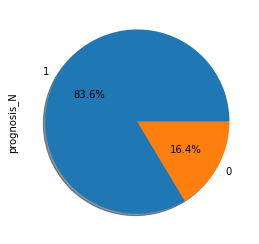

In [40]:
df1['prognosis_N'].value_counts().plot(kind="pie",shadow=True,autopct='%1.1f%%')

<AxesSubplot:ylabel='prognosis_N'>

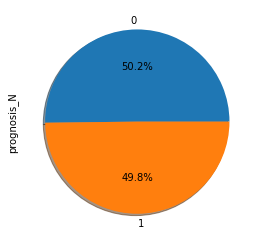

In [41]:
df2['prognosis_N'].value_counts().plot(kind="pie",shadow=True,autopct='%1.1f%%')

In [ ]:
#diastolic_bp

In [43]:
df1=data_1[data_1["diastolic_bp"]>80]
df2=data_1[data_1["diastolic_bp"]<80]

<AxesSubplot:ylabel='prognosis_N'>

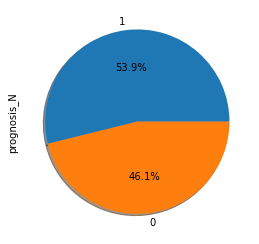

In [44]:
df1['prognosis_N'].value_counts().plot(kind="pie",shadow=True,autopct='%1.1f%%')

<AxesSubplot:ylabel='prognosis_N'>

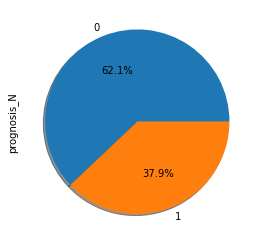

In [45]:
df2['prognosis_N'].value_counts().plot(kind="pie",shadow=True,autopct='%1.1f%%')

In [ ]:
#Cholesterol

In [47]:
df1=data_1[(data_1["cholesterol"]>125) & (data_1["cholesterol"]<200)]
df2=data_1[data_1["cholesterol"]<125]
df3=data_1[data_1["cholesterol"]>200]

<AxesSubplot:ylabel='prognosis_N'>

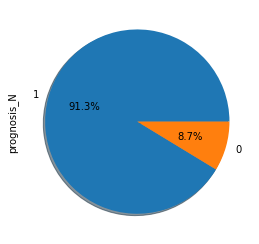

In [48]:
df1['prognosis_N'].value_counts().plot(kind="pie",shadow=True,autopct='%1.1f%%')

<AxesSubplot:ylabel='prognosis_N'>

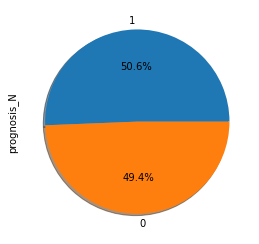

In [49]:
df2['prognosis_N'].value_counts().plot(kind="pie",shadow=True,autopct='%1.1f%%')

<AxesSubplot:ylabel='prognosis_N'>

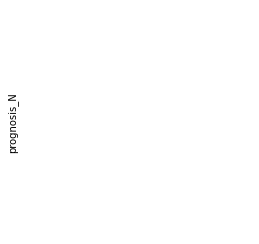

In [50]:
df3['prognosis_N'].value_counts().plot(kind="pie",shadow=True,autopct='%1.1f%%')

### Doubts - 
1. is there any validation data ? to decide train - test - validation 
2. if possible can we use tableau or powerbi to present the reports
3. what are different option to deploy the model other than flask ans streamlit